<a href="https://colab.research.google.com/github/prashasthamulinti-blip/Lab1colabIHUB/blob/main/AIML_Module_2_Lab_4_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)

---



This lab will be based upon t-SNE which is a dimensionality reduction algorithm used to visualize high dimensional datasets.

t-SNE stands for t-Distributed Stochastic Neighbor Embedding. It is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. It was developed by Laurens van der Maatens and Geoffrey Hinton in 2008 (Link to the paper: https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

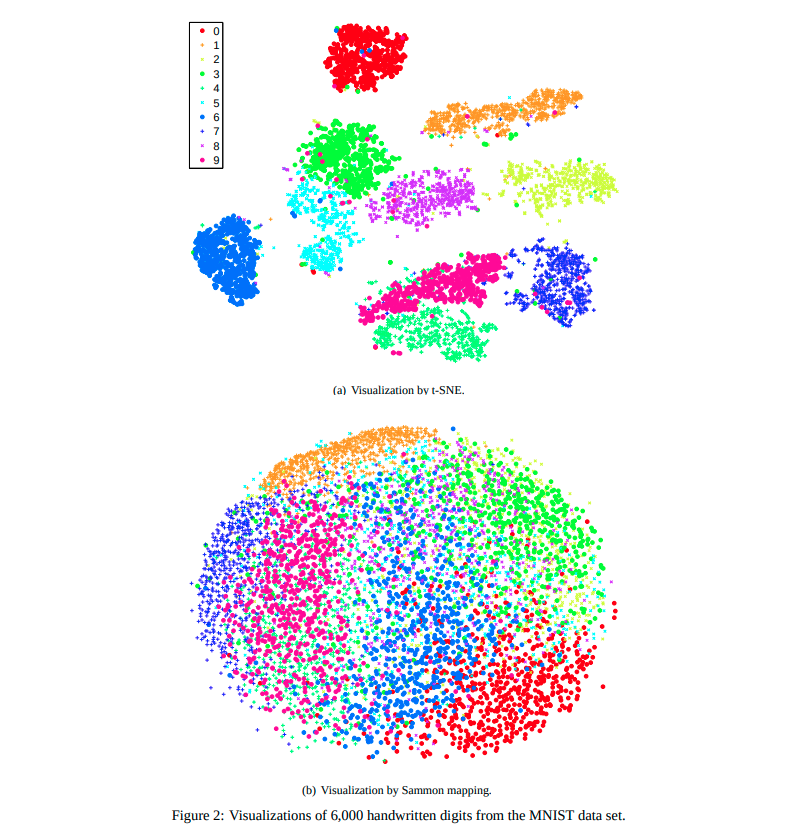

t-SNE has a tuneable parameter, **perplexity** which balances attention between the local and global aspects of your data. It is a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of t-SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

Also the t-SNE algorithm doesn’t always produce similar output on successive runs as there are additional hyperparameters related to the optimization process.

### HOW DOES T-SNE WORK??

The t-SNE algorithm calculates a similarity measure between pairs of instances in the high dimensional space and in the low dimensional space. It then tries to optimize these two similarity measures using a cost function. Let’s break that down into 3 basic steps.

1. Measure similarities between points in the high dimensional space. Think of a bunch of data points scattered on a 2D space. For each data point (xi) we’ll center a Gaussian distribution over that point. Then we measure the density of all points (xj) under that Gaussian distribution. Then renormalize for all points. This gives us a set of probabilities (Pij) for all points. Those probabilities are proportional to the similarities. All that means is, if data points x1 and x2 have equal values under this gaussian circle then their proportions and similarities are equal and hence you have local similarities in the structure of this high-dimensional space. The Gaussian distribution or circle can be manipulated using what’s called perplexity, which influences the variance of the distribution (circle size) and essentially the number of nearest neighbors.

2. This step is similar to step 1, but instead of using a Gaussian distribution we use a Student t-distribution with one degree of freedom, which is also known as the Cauchy distribution (See fig below). This gives us a second set of probabilities (Qij) in the low dimensional space. As you can see the Student t-distribution has heavier tails than the normal distribution. The heavy tails allow for better modeling of far apart distances.

3. The last step is that we want these set of probabilities from the low-dimensional space (Qij) to reflect those of the high dimensional space (Pij) as best as possible. We want the two map structures to be similar. We measure the difference between the probability distributions of the two-dimensional spaces using Kullback-Liebler divergence (KL). Finally, we use gradient descent to minimize our KL cost function.

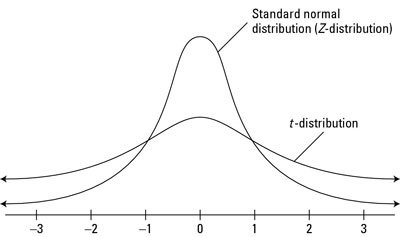

Scikit-learn has an implementation of t-SNE available which provides a wide variety of tuning parameters for t-SNE, and the most notable ones are:

1. n_components (default: 2): Dimension of the embedded space.
2. perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
3. n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
4. method (default: ‘barnes_hut’): Barnes-Hut approximation runs in O(NlogN) time. method=’exact’ will run on the slower, but exact, algorithm in O(N^2) time.

In [ ]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

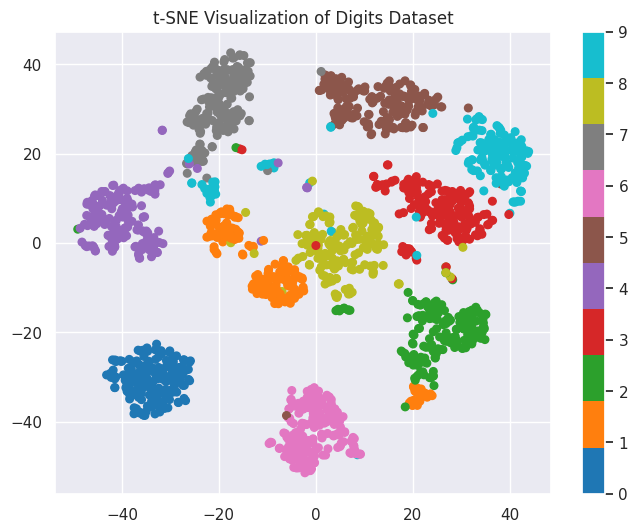

In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="darkgrid", palette="muted", context="notebook")
RS = 20150101

# Load and scale digits dataset
digits = load_digits()
data = scale(digits.data)
labels = digits.target

# Compute t-SNE
tsne = TSNE(random_state=RS)
Y = tsne.fit_transform(data)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], c=labels, cmap="tab10", s=30)
plt.colorbar()
plt.title("t-SNE Visualization of Digits Dataset")
plt.show()


1797 images each of size 8 x 8 loaded using load_digits()

In [2]:
digits = load_digits()
digits.data.shape

(1797, 64)

Printing some images from the dataset

---



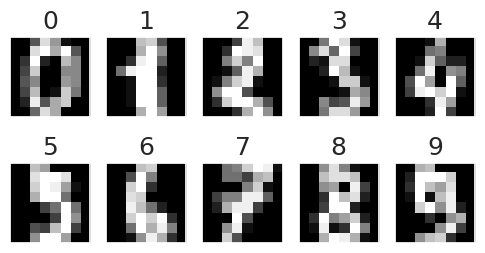

In [ ]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

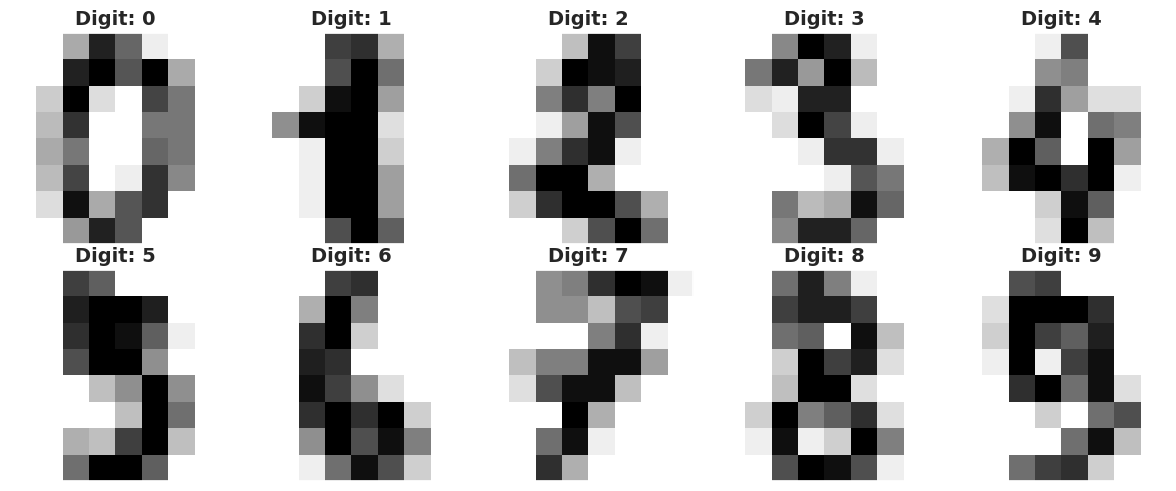

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()

# Grid size
nrows, ncols = 2, 5
num_images = nrows * ncols

# Create figure
plt.figure(figsize=(12, 5))
plt.gray()

for i in range(num_images):
    ax = plt.subplot(nrows, ncols, i + 1)

    # Show image
    ax.imshow(digits.images[i], cmap="gray_r", interpolation="nearest")

    # Title
    ax.set_title(f"Digit: {digits.target[i]}", fontsize=14, fontweight="bold")

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

# Adjust layout
plt.tight_layout()
plt.show()


In [4]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

## Now using TSNE to fit the dataset with the default values.


1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : ‘barnes_hut’


---



In [5]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

#### Visualizing the data in the projected space

---



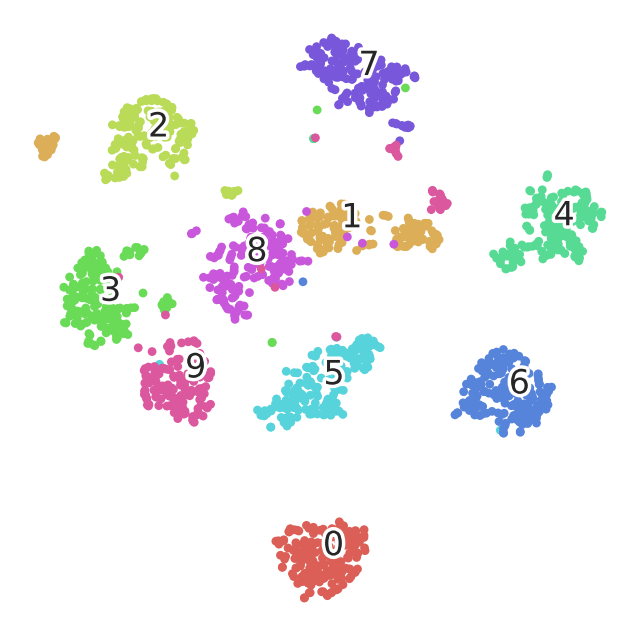

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a13716f6ce0>)

In [ ]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

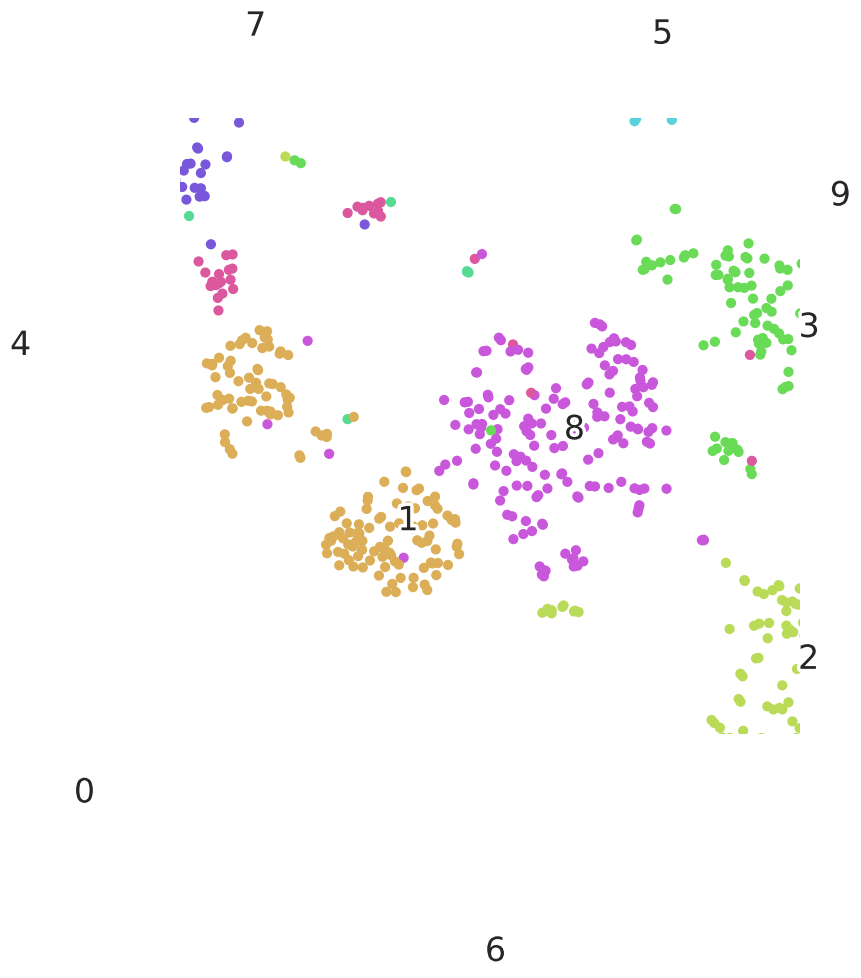

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7d9b9b19de20>)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patheffects as PathEffects
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

# --- Load and prepare data ---
digits = load_digits()
X = scale(digits.data)
y = digits.target

# --- Run t-SNE ---
tsne = TSNE(random_state=1)
digits_proj = tsne.fit_transform(X)

# --- Scatter plot function ---
def scatter(x, colors):
    palette = sns.color_palette("hls", 10)

    fig, ax = plt.subplots(figsize=(8, 8))
    sc = ax.scatter(x[:, 0], x[:, 1], s=40,
                    c=[palette[c] for c in colors])

    ax.set_xlim(-25, 25)
    ax.set_ylim(-25, 25)
    ax.axis("off")

    # Add digit labels at cluster centers
    for i in range(10):
        xc, yc = x[colors == i].mean(axis=0)
        ax.text(xc, yc, str(i), fontsize=24,
                path_effects=[
                    PathEffects.Stroke(linewidth=5, foreground="w"),
                    PathEffects.Normal()
                ])

    plt.show()
    return fig, ax, sc

# --- Call the function ---
scatter(digits_proj, y)


# Tweaking some of the hyperparameters to better understand their role

---

### Changing the PERPLEXITY values


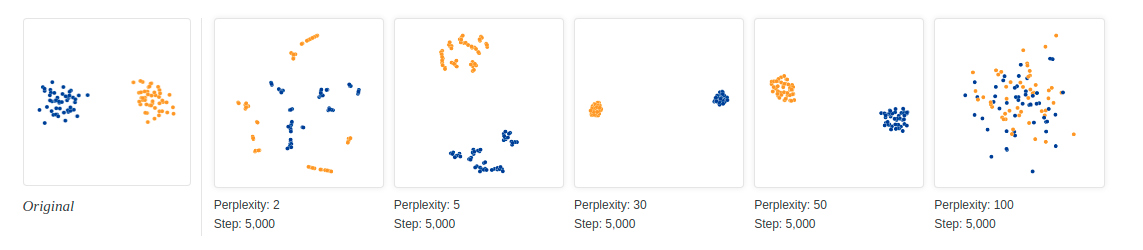

With perplexity values in the range (5 - 50) suggested by van der Maaten & Hinton, the diagrams do show these clusters, although with very different shapes. Outside that range, things get a little weird. With perplexity 2, local variations dominate. The image for perplexity 100, with merged clusters, illustrates a pitfall: for the algorithm to operate properly, the perplexity really should be smaller than the number of points. Implementations can give unexpected behavior otherwise.



---


1. n_components : 2
2. perplexity : **5**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

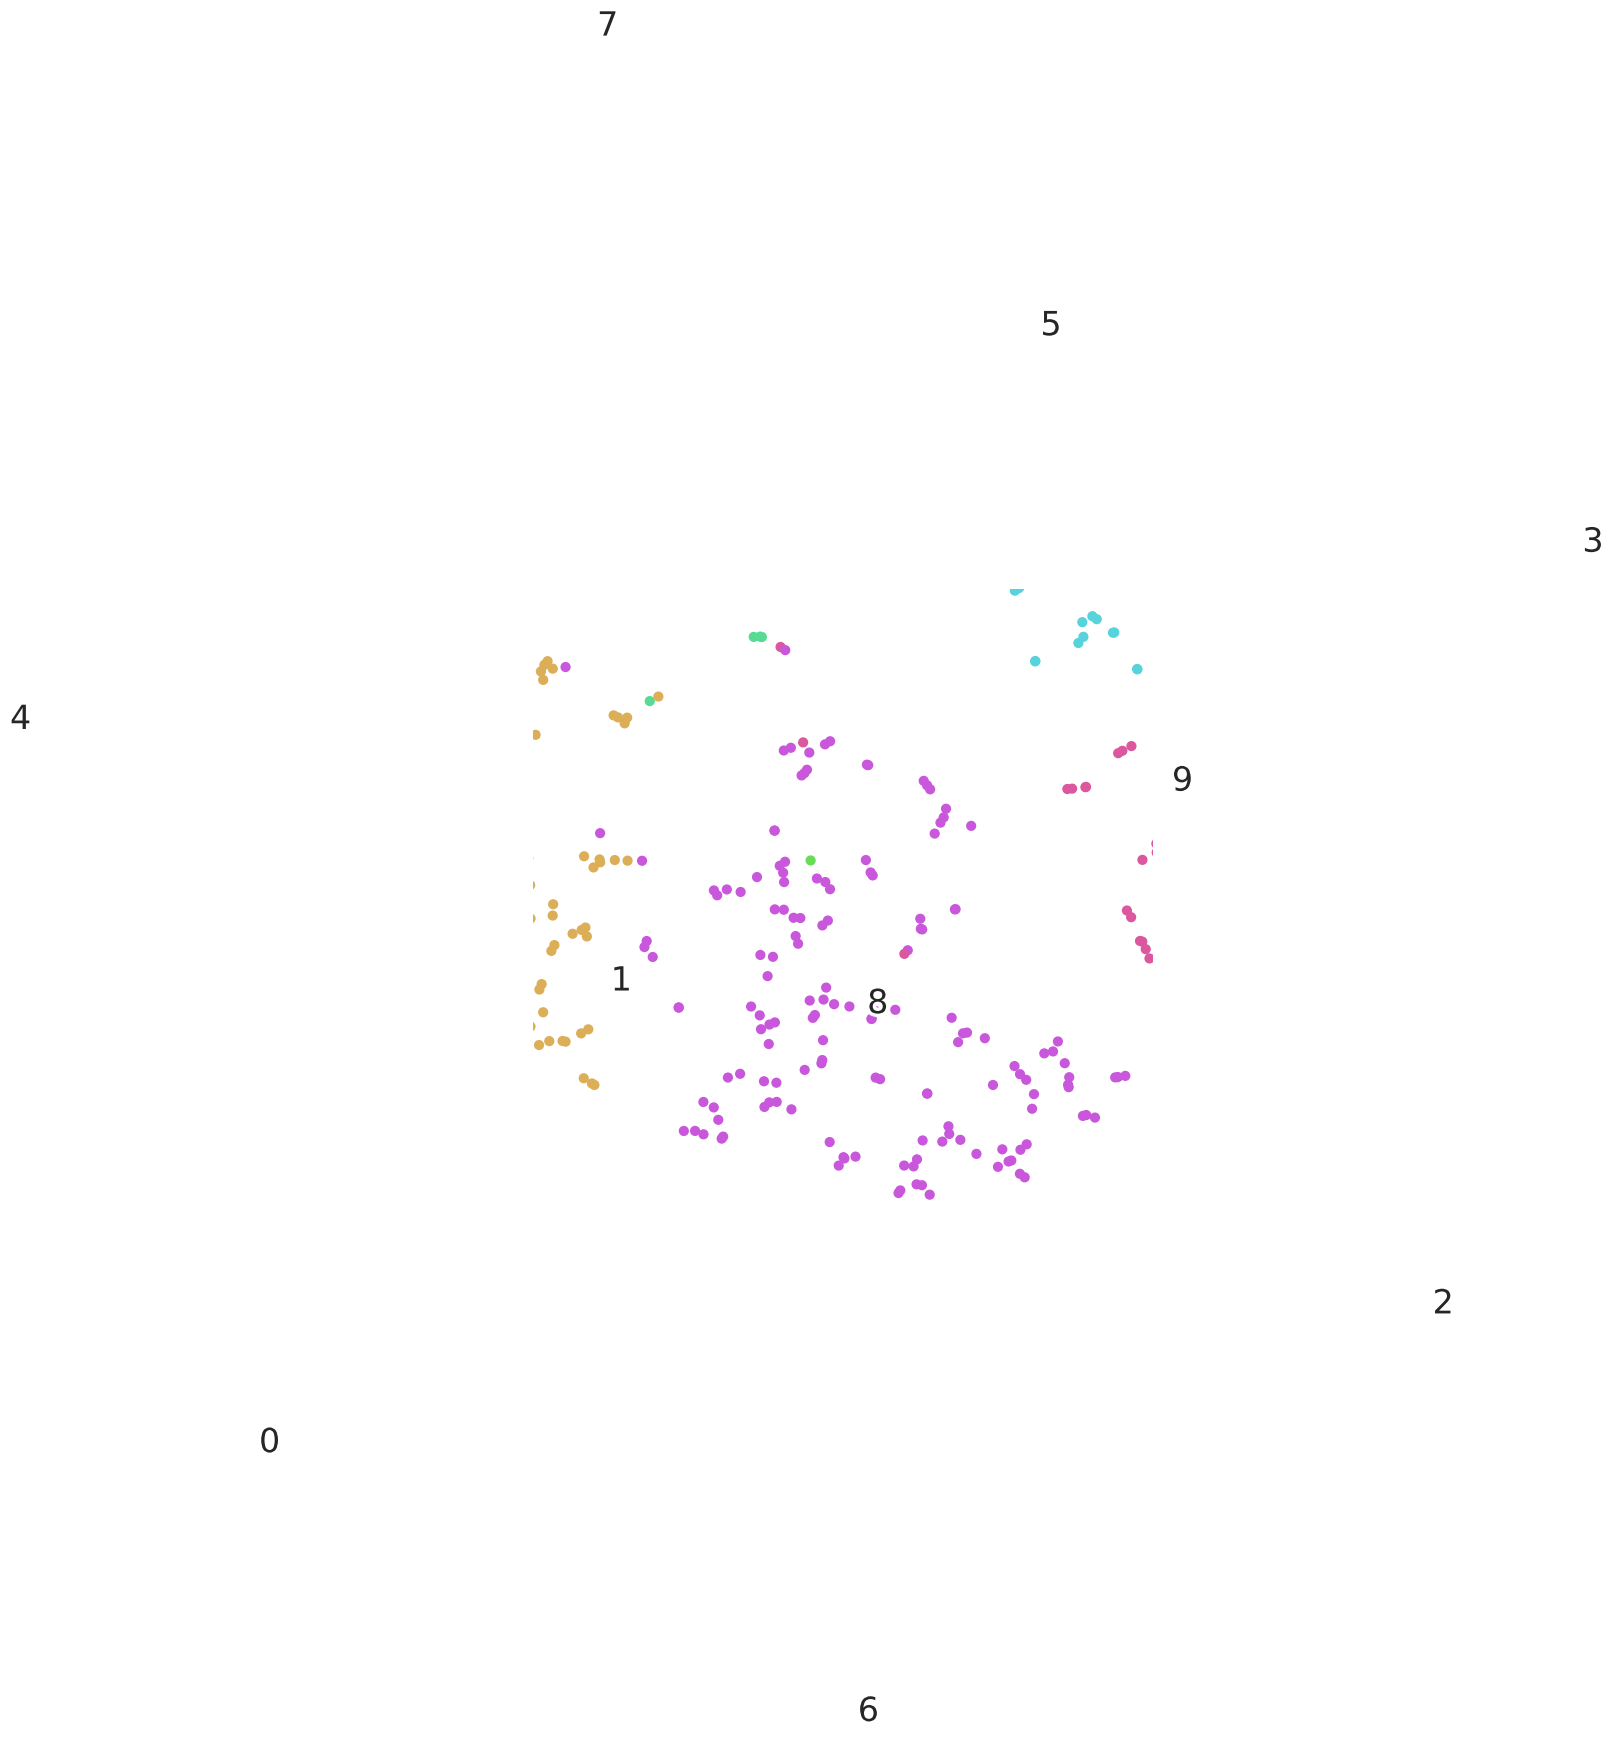

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7d9b98e1aa80>)

In [8]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=5).fit_transform(X)

scatter(digits_proj, y)

We can see that there are local clusters within the same number group as well. This is happening as the perplexity being at 5, allows the local neighbourhood to dominate. Let us now see what happens if we increase the perplexity to 100, thereby increasing global impact.





---


1. n_components : 2
2. perplexity : **100**
3. n_iter : 1000
4. method : ‘barnes_hut’


---

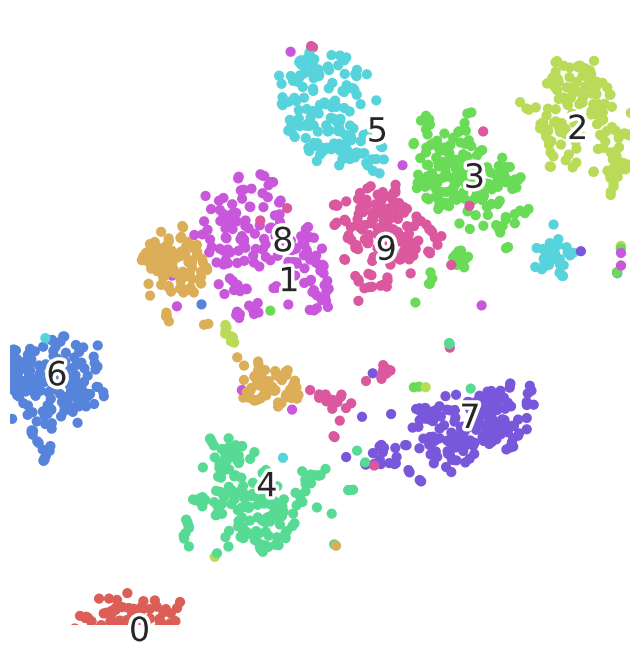

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7d9b94a61700>)

In [9]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=100).fit_transform(X)

scatter(digits_proj, y)

The general structure of the plot remained similar to the one with perplexity = 30 (default), but on careful observation you can observe many data points not being part of the group they are supposed to be in. This is because of the large number of points considered for the neighbourhood (as perplexity value = 100 is higher), thereby allowing 2 data points from different groups to end up closer.



---

### Changing the NUMBER OF ITERATIONS

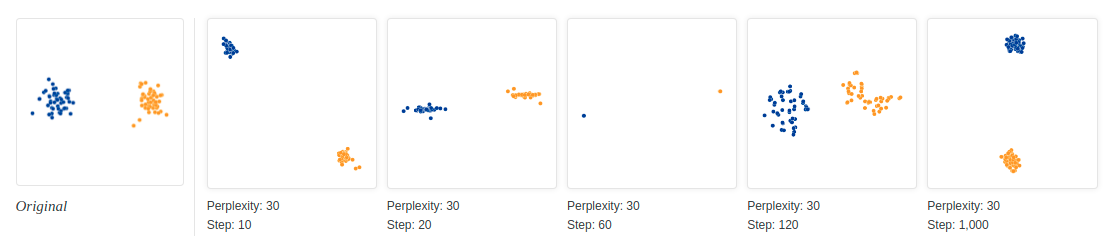

The images above show five different runs at perplexity 30. The first four were stopped before stability. After 10, 20, 60, and 120 steps you can see layouts with seeming 1-dimensional and even pointlike images of the clusters. If you see a t-SNE plot with strange “pinched” shapes, chances are the process was stopped too early. Unfortunately, there’s no fixed number of steps that yields a stable result. Different data sets can require different numbers of iterations to converge.

The most important thing is to iterate until reaching a stable configuration.





---


1. n_components : 2
2. perplexity : 30
3. n_iter : **250**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


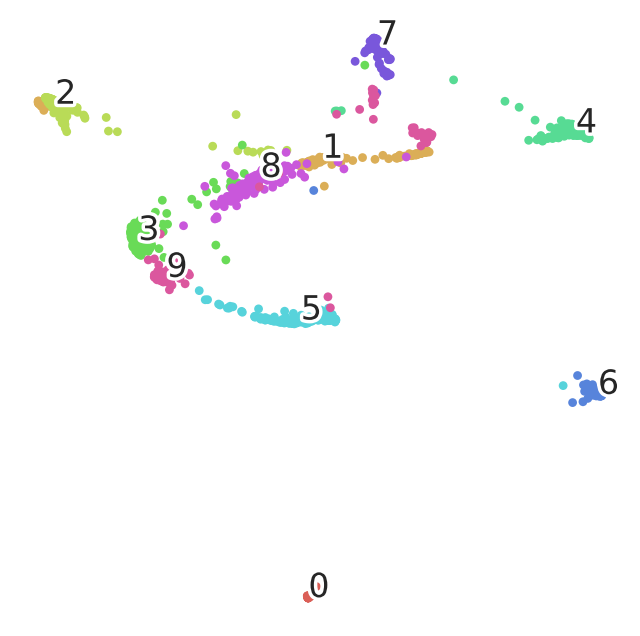

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a1371632800>)

In [ ]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=250).fit_transform(X)

scatter(digits_proj, y)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


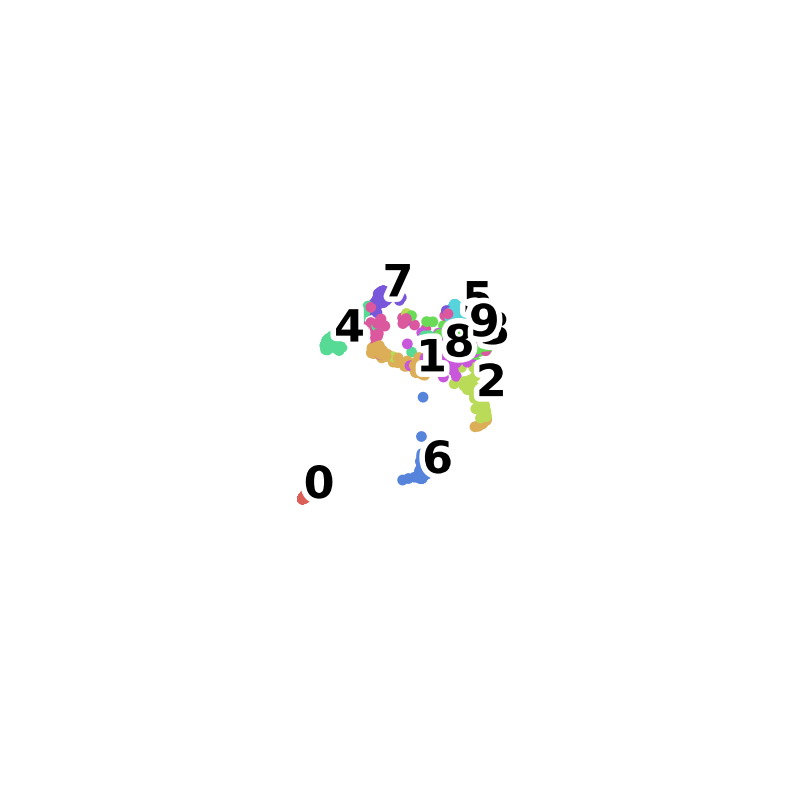

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7d9b94563ad0>)

In [10]:
# ----------------------------------------
# 1. Imports
# ----------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patheffects as PathEffects
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

sns.set(style="darkgrid", palette="muted", context="notebook")

# ----------------------------------------
# 2. Load and scale the digits dataset
# ----------------------------------------
digits = load_digits()
X = scale(digits.data)      # Standardize the pixel features
y = digits.target           # Labels (0–9)

# Random seed
RS = 20150101

# ----------------------------------------
# 3. Scatter plotting function
# ----------------------------------------
def scatter(x, colors):
    # Create 10 distinct colors (one per digit)
    palette = sns.color_palette("hls", 10)

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot points
    sc = ax.scatter(
        x[:, 0], x[:, 1],
        s=60,                            # bigger, clearer points
        linewidth=0,
        c=[palette[int(c)] for c in colors]  # color by digit
    )

    # Beautify axes
    ax.set_xlim(x[:, 0].min() - 5, x[:, 0].max() + 5)
    ax.set_ylim(x[:, 1].min() - 5, x[:, 1].max() + 5)
    ax.axis("off")

    # Add large digit labels at cluster centers
    for digit in range(10):
        x_digit = x[colors == digit]        # all points with same label
        x_mean, y_mean = x_digit.mean(axis=0)

        txt = ax.text(
            x_mean, y_mean, str(digit),
            fontsize=32, weight="bold",
            color="black"
        )

        # Add white outline for readability
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=8, foreground="white"),
            PathEffects.Normal()
        ])

    plt.show()
    return fig, ax, sc

# ----------------------------------------
# 4. Run t-SNE with PCA initialization
# ----------------------------------------
tsne = TSNE(
    init="pca",
    random_state=RS,
    n_iter=250,
    learning_rate="auto",
    perplexity=30           # default for digits
)

digits_proj = tsne.fit_transform(X)

# ----------------------------------------
# 5. Plot t-SNE projection
# ----------------------------------------
scatter(digits_proj, y)


As can be seen from the figure above, stopping the optimization earlier (in 250 iterations) resulted in a suboptimal clustering of the groups.

Let us now see how the results are affected if t-SNE is run for larger number of iterations


---


1. n_components : 2
2. perplexity : 30
3. n_iter : **5000**
4. method : ‘barnes_hut’


---

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


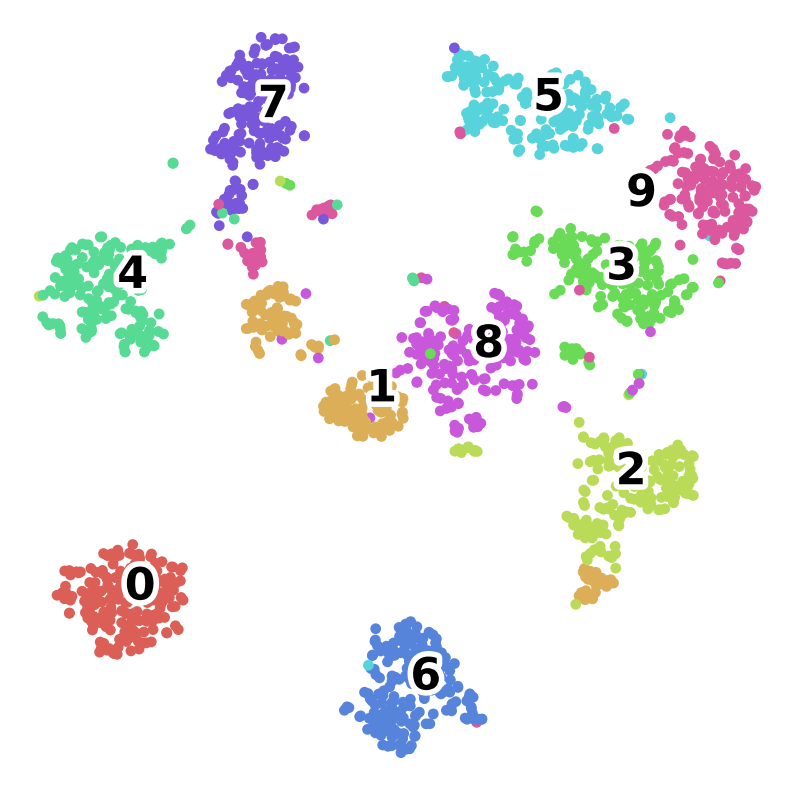

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7d9b945f9880>)

In [11]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=5000).fit_transform(X)

scatter(digits_proj, y)

Running for larger number of iterations more or less resulted in the same plot as the optimization had nearly converged till the default 1000 iterations. However the density of the clusters has increased.

---

### Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.


---

1. n_components : 2
2. perplexity : 30
3. n_iter : 1000
4. method : **‘exact’**


---

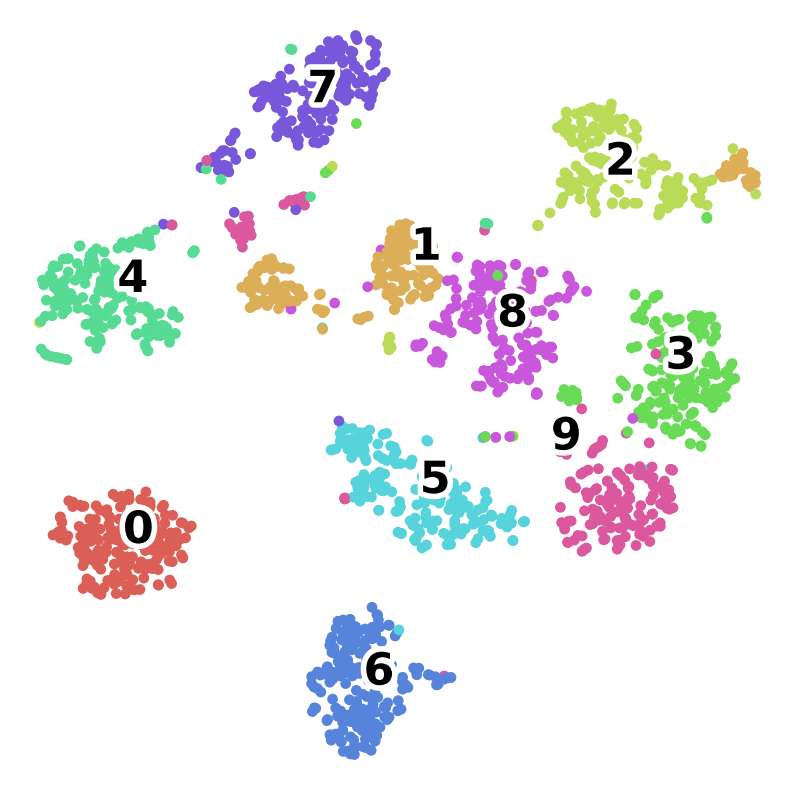

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7d9b94fede20>)

In [12]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

## EXERCISE

---



Try out different perplexity and iteration values to better appreciate the concepts taught.

You can modify the code in the cell below to check the resultant plots.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


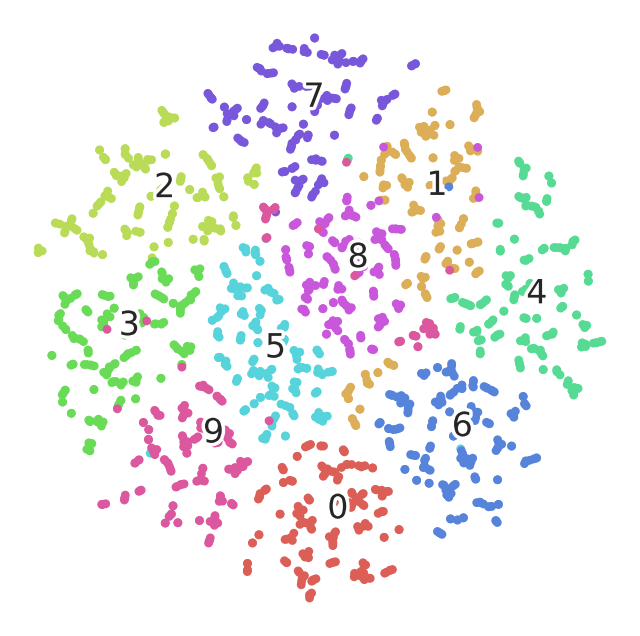

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x7a137138e500>)

In [ ]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 2
number_iterations = 1000
method = "barnes_hut"

###############################################################

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)



---

## Exercise:

1. Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?


>##### Pointers:

> a. Which of the two algorithms is linear and which one is non-linear?    
b. How does the non-linearity in one of these two algorithms help in capturing certain data sets?    
c. PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?    
d. Can you comment on which one of the two is computationally more expensive?

2. How does the computational complexity and runtime of t-SNE scale with dataset size and dimensionality?

3. What are some limitations or potential pitfalls to be aware of when using t-SNE? (tell atleast 3)


In [13]:
from sklearn.decomposition import PCA
import numpy as np

# Create synthetic dataset
X = np.random.randn(100, 5)

# Linear PCA projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("PCA Components (linear projection matrix):")
print(pca.components_)


PCA Components (linear projection matrix):
[[ 0.15158723 -0.34672965 -0.54237871  0.03386864  0.74931843]
 [-0.37171903 -0.44077918  0.56515462 -0.50617493  0.30319279]]


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

print("t-SNE output shape:", X_tsne.shape)
# t-SNE does NOT provide a linear transformation matrix


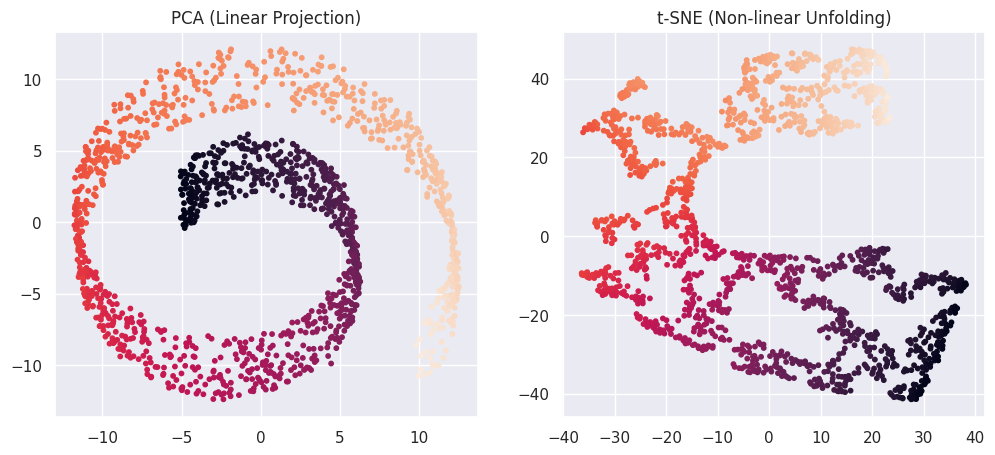

In [14]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Create Swiss roll
X, color = make_swiss_roll(n_samples=1500, noise=0.1)

# PCA reduction
X_pca = PCA(n_components=2).fit_transform(X)

# t-SNE reduction
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)

# Plot
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=color, s=10)
plt.title("PCA (Linear Projection)")

plt.subplot(1,2,2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=color, s=10)
plt.title("t-SNE (Non-linear Unfolding)")

plt.show()


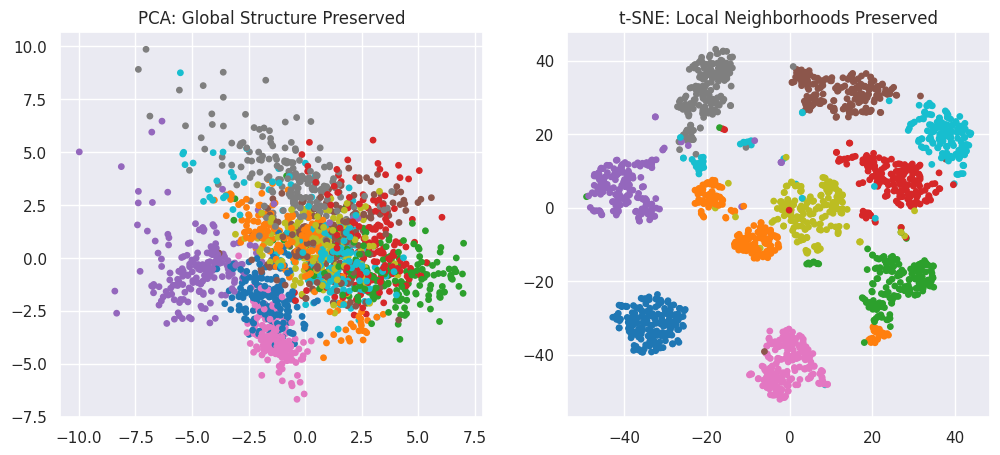

In [15]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

digits = load_digits()
X = scale(digits.data)
y = digits.target

# PCA and t-SNE embeddings
X_pca = PCA(n_components=2).fit_transform(X)
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="tab10", s=15)
plt.title("PCA: Global Structure Preserved")

plt.subplot(1,2,2)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="tab10", s=15)
plt.title("t-SNE: Local Neighborhoods Preserved")

plt.show()


In [16]:
import numpy as np
from sklearn.manifold import TSNE
import time

def benchmark_tsne(samples_list, dim_list, random_state=0):
    results = []

    for n in samples_list:
        for d in dim_list:
            print(f"\nRunning t-SNE with n={n}, d={d}")

            # Generate synthetic dataset
            X = np.random.randn(n, d)

            # Start timing
            start = time.time()

            tsne = TSNE(
                n_components=2,
                init="random",
                random_state=random_state,
                perplexity=30
            )

            tsne.fit_transform(X)
            runtime = time.time() - start

            print(f"Runtime: {runtime:.3f} seconds")
            results.append((n, d, runtime))

    return results


# Test scaling for:
# - different number of samples
# - different dimensionality
samples_list = [500, 1000, 2000]     # increase n
dim_list = [10, 50, 100]            # increase d

results = benchmark_tsne(samples_list, dim_list)

print("\nFinal Results:")
for r in results:
    print(f"n={r[0]:4d}, d={r[1]:3d} --> {r[2]:.3f} seconds")



Running t-SNE with n=500, d=10
Runtime: 7.581 seconds

Running t-SNE with n=500, d=50
Runtime: 3.997 seconds

Running t-SNE with n=500, d=100
Runtime: 4.312 seconds

Running t-SNE with n=1000, d=10
Runtime: 9.010 seconds

Running t-SNE with n=1000, d=50
Runtime: 10.539 seconds

Running t-SNE with n=1000, d=100
Runtime: 11.415 seconds

Running t-SNE with n=2000, d=10
Runtime: 18.569 seconds

Running t-SNE with n=2000, d=50
Runtime: 22.605 seconds

Running t-SNE with n=2000, d=100
Runtime: 26.477 seconds

Final Results:
n= 500, d= 10 --> 7.581 seconds
n= 500, d= 50 --> 3.997 seconds
n= 500, d=100 --> 4.312 seconds
n=1000, d= 10 --> 9.010 seconds
n=1000, d= 50 --> 10.539 seconds
n=1000, d=100 --> 11.415 seconds
n=2000, d= 10 --> 18.569 seconds
n=2000, d= 50 --> 22.605 seconds
n=2000, d=100 --> 26.477 seconds


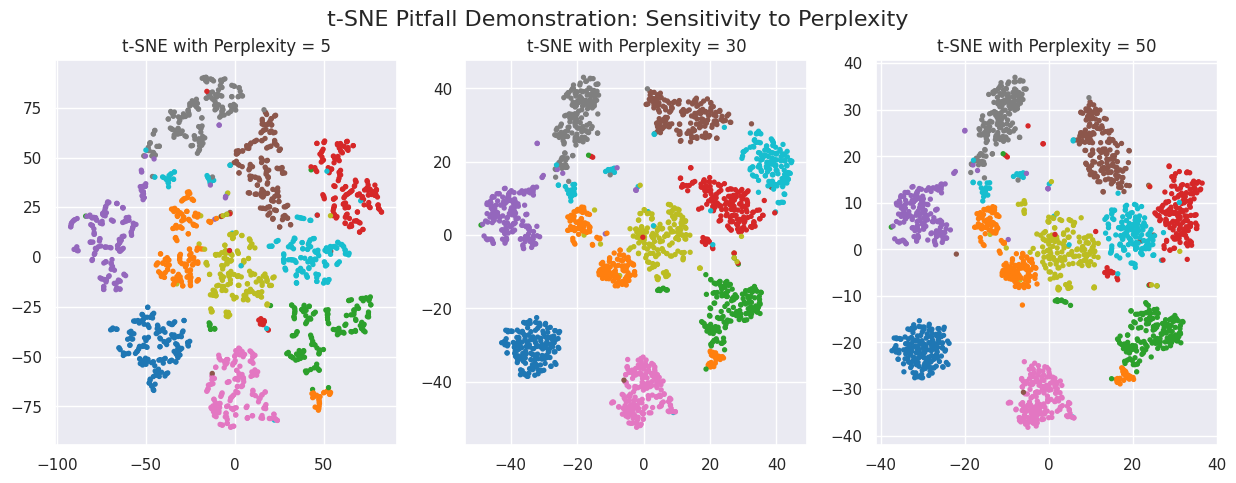

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load dataset
digits = load_digits()
X = StandardScaler().fit_transform(digits.data)
y = digits.target

# Try multiple perplexity values
perplexities = [5, 30, 50]

plt.figure(figsize=(15, 5))

for i, perp in enumerate(perplexities):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_embedded = tsne.fit_transform(X)

    plt.subplot(1, 3, i+1)
    scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap="tab10", s=8)
    plt.title(f"t-SNE with Perplexity = {perp}")

plt.suptitle("t-SNE Pitfall Demonstration: Sensitivity to Perplexity", fontsize=16)
plt.show()




---
 ## Some interesting references:

 1. https://blog.paperspace.com/dimension-reduction-with-t-sne/
 2. https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1
 3. https://distill.pub/2016/misread-tsne/



---


